In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
HDBPrices = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

In [3]:
HDBPrices.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [4]:
HDBPrices.head(20)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [5]:
columnsName = [j for j in HDBPrices.columns]
columnsDtypes = [j for j in HDBPrices.dtypes]
mapping = zip(columnsName, columnsDtypes)

categoricalColumns = []
for pair in mapping:
    if pair[1] == 'object':
        categoricalColumns.append(pair[0])
        HDBPrices[pair[0]] = HDBPrices[pair[0]].astype('category')

### Deciding on what data to use to predict prices of HDB flats

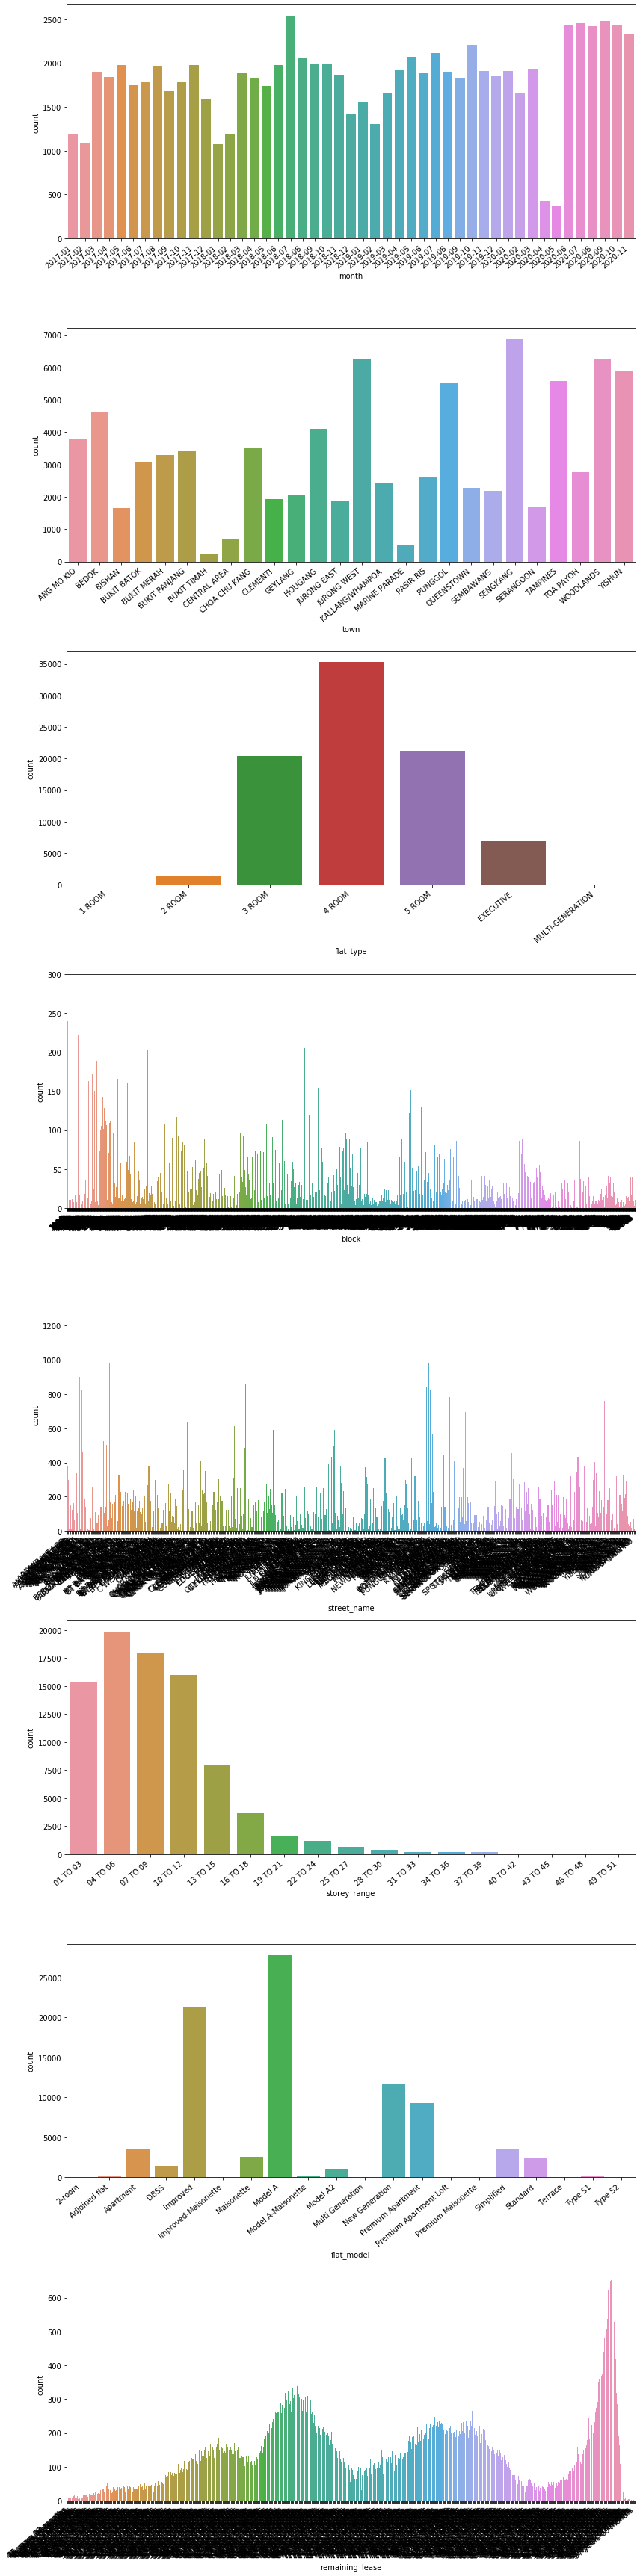

In [6]:
f, ax = plt.subplots(8, 1, figsize=(12, 48))
for i in range(len(categoricalColumns)):
    display = sb.countplot(HDBPrices[categoricalColumns[i]], ax=ax[i])
    display.set_xticklabels(display.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()

### Based on the current visualised data...

1) Month might be a random value for prediction, because it is not showing any trends <br>
2) Block seems to be a too varied to be used in prediction... there might be repeated blocks, different numbering of blocks etc <br>
3) Remaining lease is abit... idk what to say

### Data I feel to be used for predictions...
1) Town <br>
2) Flat Type <br>
3) Storey Range <br>
4) Flat Model <br>
5) Remaining lease

### Proposal to modify the data values for "remaining_lease"
XX Year XX months -> XX Year, if XX month > 6 month, XX + 1 Year

In [7]:
modified_remaining_lease = []
for i in range(len(HDBPrices['remaining_lease'])):
    remaining_lease = HDBPrices['remaining_lease'][i]
    if 'month' in remaining_lease:
        end = remaining_lease.index('month') - 1
        start = end - 2
        if int(remaining_lease[start:end]) >= 6:
            yearsRemaining = int(remaining_lease[0:2]) + 1
        else:
            yearsRemaining = int(remaining_lease[0:2])
    else:
        yearsRemaining = int(remaining_lease[0:2])
    modified_remaining_lease.append(f'{yearsRemaining} Years')
    
new_column = {'remaining_lease': modified_remaining_lease}

In [8]:
modified_remaining_lease = pd.DataFrame(new_column)
modified_remaining_lease.astype('category')
HDBPrices['remaining_lease'] = modified_remaining_lease

In [9]:
storey_range = HDBPrices['storey_range']

modified_storey_range = []

for i in storey_range:
    if i == '01 TO 03':
        modified_storey_range.append('Very Low')
    elif i == '04 TO 06':
        modified_storey_range.append('Low')
    elif i == '07 TO 09':
        modified_storey_range.append('Intermediate')
    elif i == '10 TO 12':
        modified_storey_range.append('High')
    else:
        modified_storey_range.append('Very High')

new_height = {'storey_range': modified_storey_range}
modified_storey_range = pd.DataFrame(new_height)
modified_storey_range.astype('category')
HDBPrices['storey_range'] = modified_storey_range

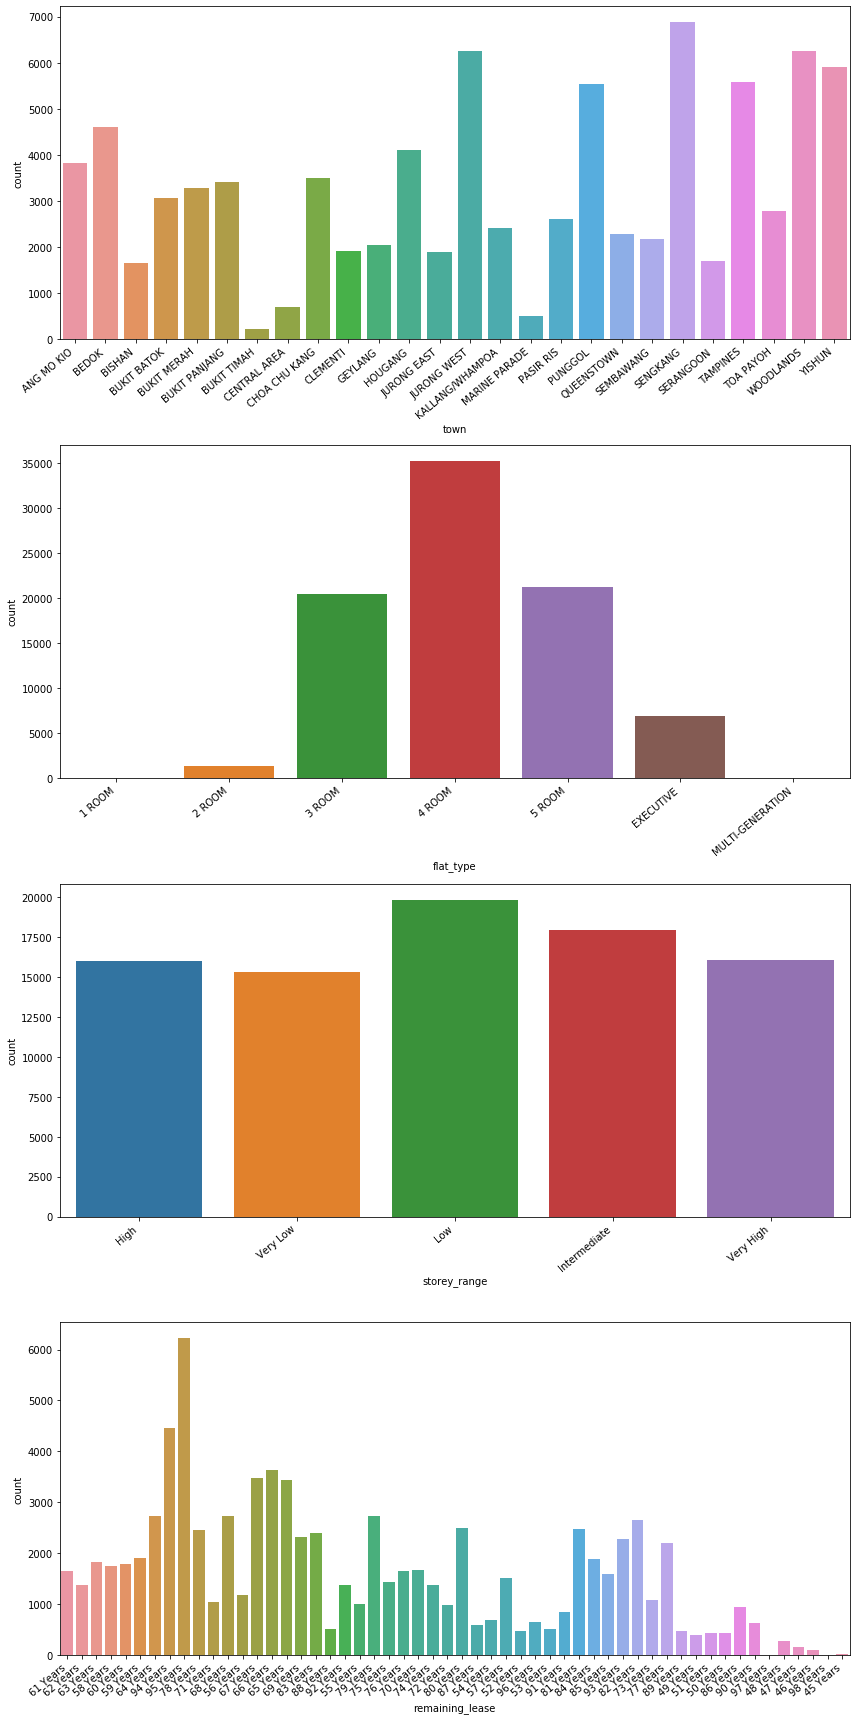

In [10]:
HDBPrices = HDBPrices.drop(columns=['block', 'street_name', 'flat_model', 'lease_commence_date', 'month'])

f, ax = plt.subplots(4, 1, figsize=(12, 24))

categoricalColumns = ['town', 'flat_type', 'storey_range', 'remaining_lease']

for i in range(len(categoricalColumns)):
    display = sb.countplot(HDBPrices[categoricalColumns[i]], ax=ax[i])
    display.set_xticklabels(display.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()

In [11]:
columnsToBeUsed = ['town', 'flat_type', 'storey_range', 'remaining_lease']
HDBPrices['floor_area_sqm'] = HDBPrices['floor_area_sqm'].astype('category')
HDBPrices['storey_range'] = HDBPrices['storey_range'].astype('category')
HDBPrices['remaining_lease'] = HDBPrices['remaining_lease'].astype('category')
HDBPrices.head()

,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,High,44.0,61 Years,232000.0
1,ANG MO KIO,3 ROOM,Very Low,67.0,61 Years,250000.0
2,ANG MO KIO,3 ROOM,Very Low,67.0,62 Years,262000.0
3,ANG MO KIO,3 ROOM,Low,68.0,62 Years,265000.0
4,ANG MO KIO,3 ROOM,Very Low,67.0,62 Years,265000.0


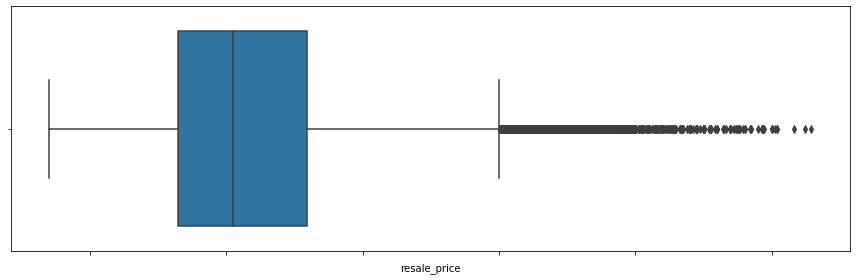

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 4))
display = sb.boxplot(HDBPrices['resale_price'])
display.set_xticklabels(display.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [13]:
my_dict = {}
modified_resale_price = []
for i in HDBPrices['resale_price']:
    if i <= 200_000:
        my_dict['100,000 TO 200,000'] = my_dict.get('100,000 TO 200,000', 0)+1
        modified_resale_price.append('100,000 TO 200,000')
    elif i <= 300_000:
        my_dict['200,001 TO 300,000'] = my_dict.get('200,001 TO 300,000', 0)+1
        modified_resale_price.append('200,001 TO 300,000')
    elif i <= 400_000:
        my_dict['300,001 TO 400,000'] = my_dict.get('300,001 TO 400,000', 0)+1
        modified_resale_price.append('300,001 TO 400,000')
    elif i <= 500_000:
        my_dict['400,001 TO 500,000'] = my_dict.get('400,001 TO 500,000', 0)+1
        modified_resale_price.append('400,001 TO 500,000')
    elif i <= 600_000:
        my_dict['500,001 TO 600,000'] = my_dict.get('500,001 TO 600,000', 0)+1
        modified_resale_price.append('500,001 TO 600,000')
    elif i <= 700_000:
        my_dict['600,001 TO 700,000'] = my_dict.get('600,001 TO 700,000', 0)+1
        modified_resale_price.append('600,001 TO 700,000')
    elif i <= 800_000:
        my_dict['700,001 TO 800,000'] = my_dict.get('700,001 TO 800,000', 0)+1
        modified_resale_price.append('700,001 TO 800,000')
    elif i <= 900_000:
        my_dict['800,001 TO 900,000'] = my_dict.get('800,001 TO 900,000', 0)+1
        modified_resale_price.append('800,001 TO 900,000')
    else:
        my_dict['900,000 OR MORE'] = my_dict.get('900,000 OR MORE', 0)+1
        modified_resale_price.append('900,000 OR MORE')

In [14]:
my_dict

{'200,001 TO 300,000': 13633,
 '300,001 TO 400,000': 26212,
 '400,001 TO 500,000': 21736,
 '500,001 TO 600,000': 10782,
 '600,001 TO 700,000': 5933,
 '700,001 TO 800,000': 3547,
 '800,001 TO 900,000': 1910,
 '900,000 OR MORE': 938,
 '100,000 TO 200,000': 438}

In [15]:
new_column = {'resale_price': modified_resale_price}
modified_resale_price = pd.DataFrame(new_column)
HDBPrices['resale_price'] = modified_resale_price
HDBPrices['resale_price'] = HDBPrices['resale_price'].astype('category')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [17]:
x_data = ['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'remaining_lease']
x = pd.DataFrame(HDBPrices[x_data])
y = HDBPrices['resale_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [18]:
oe = OrdinalEncoder()
oe.fit(x)
x_train_enc = oe.transform(x_train)
x_test_enc = oe.transform(x_test)

In [19]:
le = LabelEncoder()
le.fit(y)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [20]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3, criterion='gini')

In [21]:
dectree.fit(x_train_enc, y_train_enc)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
graph = export_graphviz(dectree,                              # the model
                feature_names = x_train.columns,              # the features 
                out_file = None,                              # output file
                filled = True,                                # node colors
                rounded = True,                               # make pretty
                special_characters = True)                    # postscript           
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('5_layer_decision_tree.png')

C:\Users\Jin Hwee\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [23]:
y_train_pred = dectree.predict(x_train_enc)
y_test_pred = dectree.predict(x_test_enc)

In [24]:
import sklearn.metrics
print("F1_score of Model \tTrain Dataset")
print("F1_score \t:", sklearn.metrics.f1_score(y_train_enc, y_train_pred, average='micro'))
print()

# Check the Goodness of F1_score (on Test Data)
print("F1_score of Model \tTest Dataset")
print("F1_score \t:", sklearn.metrics.f1_score(y_test_enc, y_test_pred, average='micro'))
print()

F1_score of Model 	Train Dataset
F1_score 	: 0.5125188790065447

F1_score of Model 	Test Dataset
F1_score 	: 0.5084772309017581



Text(0.5, 1.0, 'Original Data')

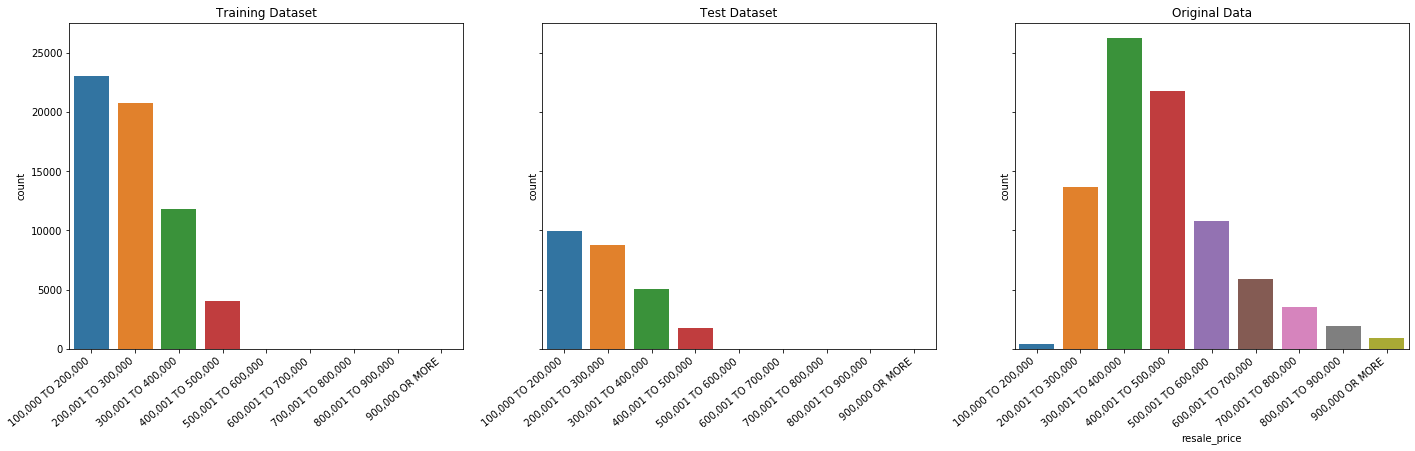

In [25]:
results_from_train = le.inverse_transform(y_train_pred)
results_from_test = le.inverse_transform(y_test_pred)
f, ax = plt.subplots(1, 3, figsize=(24, 6), sharex=True, sharey=True)
display1 = sb.countplot(results_from_train, ax=ax[0])
display1.set_xticklabels(display.get_xticklabels(), rotation=40, ha="right")
ax[0].set_title("Training Dataset")
display2 = sb.countplot(results_from_test, ax=ax[1])
display2.set_xticklabels(display2.get_xticklabels(), rotation=40, ha="right")
ax[1].set_title("Test Dataset")
display3 = sb.countplot(HDBPrices['resale_price'], ax=ax[2])
display3.set_xticklabels(display3.get_xticklabels(), rotation=40, ha="right")
ax[2].set_title("Original Data")

### Random Forest

In [26]:
model_train_test = RandomForestClassifier(n_estimators=700, criterion='entropy', random_state=0)
model_train_test.fit(x_train_enc, y_train_enc)
y_train_random_pred = model_train_test.predict(x_train_enc)
y_test_random_pred = model_train_test.predict(x_test_enc)

In [27]:
ran_results_from_train = le.inverse_transform(y_train_random_pred)
ran_results_from_test = le.inverse_transform(y_test_random_pred)

In [28]:
# Check the F1_score (on Train Data)
print("F1_score of Random Forest Model \tTrain Dataset")
print("F1_score \t:", sklearn.metrics.f1_score(y_train_enc, y_train_random_pred, average='micro'))
print()

# Check the Goodness of F1_score (on Test Data)
print("F1_score of Random Forest Model \tTest Dataset")
print("F1_score \t:", sklearn.metrics.f1_score(y_test_enc, y_test_random_pred, average='micro'))
print()

F1_score of Random Forest Model 	Train Dataset
F1_score 	: 0.8611344185265984

F1_score of Random Forest Model 	Test Dataset
F1_score 	: 0.7347977602881867



Text(0.5, 1.0, 'Original Data')

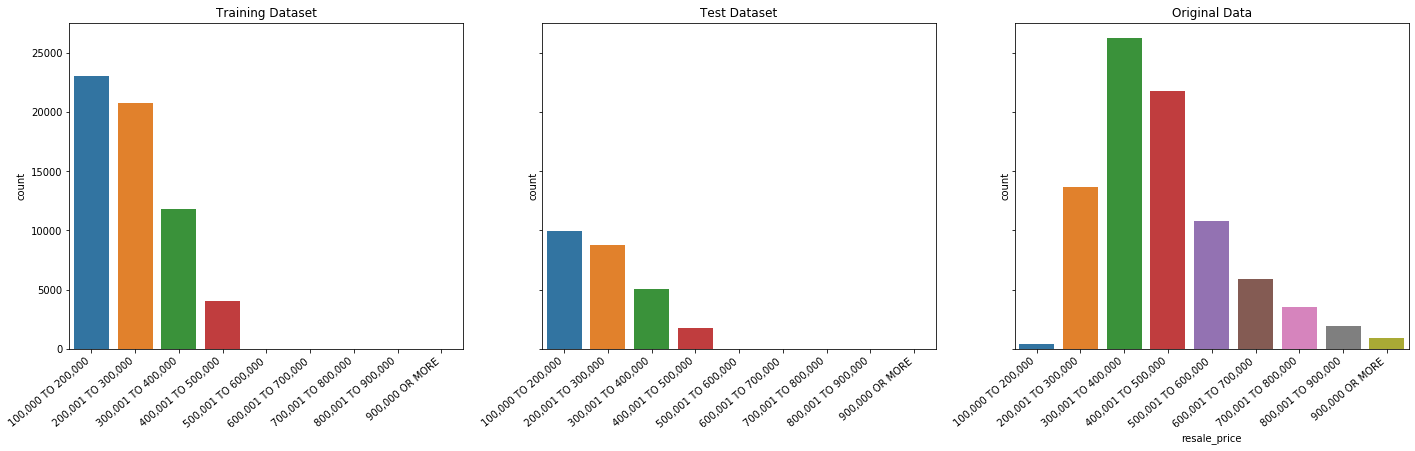

In [29]:
results_from_train = le.inverse_transform(y_train_pred)
results_from_test = le.inverse_transform(y_test_pred)
f, ax = plt.subplots(1, 3, figsize=(24, 6), sharex=True, sharey=True)
display1 = sb.countplot(results_from_train, ax=ax[0])
display1.set_xticklabels(display1.get_xticklabels(), rotation=40, ha="right")
ax[0].set_title("Training Dataset")
display2 = sb.countplot(results_from_test, ax=ax[1])
display2.set_xticklabels(display2.get_xticklabels(), rotation=40, ha="right")
ax[1].set_title("Test Dataset")
display3 = sb.countplot(HDBPrices['resale_price'], ax=ax[2])
display3.set_xticklabels(display3.get_xticklabels(), rotation=40, ha="right")
ax[2].set_title("Original Data")